In [2]:
# google drive のマウント
current_folder = "/content/drive/MyDrive/Colab Notebooks/yolox"
from google.colab import drive
drive.mount('/content/drive')
%cd $current_folder

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/yolox


In [13]:
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

# 各種のバージョンを確認する。
!python --version
print(f"numpy {np.__version__}")
print(f"pytorch {torch.__version__}")
print(f"matplotlib {matplotlib.__version__}")

Python 3.10.12
numpy 1.22.4
pytorch 2.0.1+cu118
matplotlib 3.7.1


In [8]:
# yolox install
!git clone https://github.com/Megvii-BaseDetection/YOLOX.git
%cd YOLOX
!pip install -v -e .

fatal: destination path 'YOLOX' already exists and is not an empty directory.
/content/drive/MyDrive/Colab Notebooks/yolox/YOLOX
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Obtaining file:///content/drive/MyDrive/Colab%20Notebooks/yolox/YOLOX
  Running command python setup.py egg_info
  No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
  /usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
  !!

          ********************************************************************************
          Requirements should be satisfied by a PEP 517 installer.
          If you are using pip, you can try `pip install --use-pep517`.
          ********************************************************************************

  !!
    dist.fetch_build_eggs(dist.setup_requires)
  running egg_info
  creating /tmp/pip-pip-egg-info-ebv14i1e/yolox.egg-info
  writing /

In [24]:
# 動作確認
!python tools/demo.py image -n yolox-nano -c ../checkpoints/yolox_nano.pth --path assets/dog.jpg --conf 0.25 --nms 0.45 --tsize 640 --save_result --device [cpu/gpu]

2023-07-14 03:42:46.740 | INFO     | __main__:main:259 - Args: Namespace(demo='image', experiment_name='yolox_nano', name='yolox-nano', path='assets/dog.jpg', camid=0, save_result=True, exp_file=None, ckpt='../checkpoints/yolox_nano.pth', device='[cpu/gpu]', conf=0.25, nms=0.45, tsize=640, fp16=False, legacy=False, fuse=False, trt=False)
2023-07-14 03:42:47.106 | INFO     | __main__:main:269 - Model Summary: Params: 0.91M, Gflops: 2.63
2023-07-14 03:42:47.109 | INFO     | __main__:main:282 - loading checkpoint
2023-07-14 03:42:47.827 | INFO     | __main__:main:286 - loaded checkpoint done.
2023-07-14 03:42:48.117 | INFO     | __main__:inference:165 - Infer time: 0.2474s
2023-07-14 03:42:48.135 | INFO     | __main__:image_demo:202 - Saving detection result in ./YOLOX_outputs/yolox_nano/vis_res/2023_07_14_03_42_47/dog.jpg


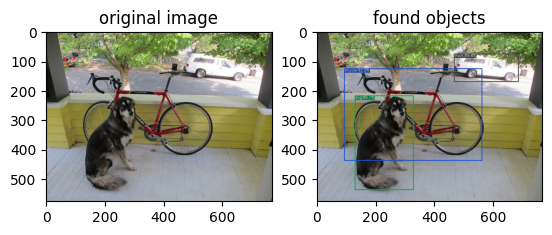

In [25]:
# 画像の表示
fig,axs = plt.subplots(nrows=1,ncols=2)
axs[0].imshow(np.asarray(Image.open("./assets/dog.jpg")))
axs[0].set_title("original image")
axs[1].imshow(np.asarray(Image.open("./YOLOX_outputs/yolox_nano/vis_res/2023_07_14_03_42_47/dog.jpg")))
axs[1].set_title("found objects")
fig.show()